In [2]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [40]:
# torch.ones([6])是[1,1,1,1,1,1]，按元素除以6则为[0.1667,0.1667,0.1667,0.1667,0.1667,0.1667]
# 下面代码的解释：https://blog.csdn.net/weixin_42426841/article/details/129317453
# 简单来说multinomial.Multinomial用来声明一个分布：第一个参数是指每次抽样抽取的样本个数，第二个参数是指顶该分布的权重或者各事件发生的概率
# sample()是进行1一次抽样
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 0., 1., 0.])

In [48]:
# 模拟投掷10次筛子，记录各个数字出现的次数
multinomial.Multinomial(10, fair_probs).sample()

tensor([2., 3., 2., 1., 1., 1.])

In [54]:
multinomial.Multinomial(10000, fair_probs).sample()
# 进行一万次的取样可以发现，每个数字大概都是1600多次

tensor([1649., 1687., 1691., 1704., 1653., 1616.])

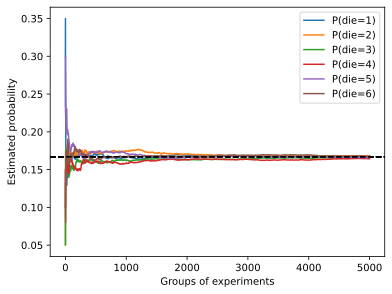

In [102]:
counts = multinomial.Multinomial(10, fair_probs).sample((5000,)) # counts记录了500次抽样的结果，因此counts结果为[500][6]
cum_counts = counts.cumsum(dim=0) # cumsum按第0维累加前面。结果为[500][6]
estimates = cum_counts / cum_counts.sum(dim=1, keepdim=True) # 将每个元素从频数换成频率

d2l.set_figsize((6, 4.5))
for i in range(6):
    e = estimates[:, i].numpy()  #的结果是[500]，设index_1为1~500，遍历estimates[:, i].numpy()，每次为[index_x]
    # 表示数字i在做了index_1次实验后出现的频率
    # 这样也不能发现，给plot函数传入一个一维数组的时候，x是下标0~count，y则是每个下标对应的元素值
    # 会发现，在500次后，数字i出现的频率不断趋于0.167
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
    d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
    d2l.plt.gca().set_xlabel('Groups of experiments')
    d2l.plt.gca().set_ylabel('Estimated probability')
    d2l.plt.legend()